In [1]:
#import library yang akan digunakan
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from numpy import random
from sklearn.metrics import silhouette_score
from scipy import stats

# Data Preparation

In [2]:
#ReadDataset
dt_test = pd.read_csv("salju_test.csv")
dt_train = pd.read_csv("salju_train.csv")

In [3]:
#menggabungkan dataset train dan test menjadi satu
dt_cluster = pd.concat([dt_test,dt_train], ignore_index=True)
dt_cluster = dt_cluster.drop(['id'], axis=1)

## Data Exploration

In [4]:
#menampilkan data teratas
dt_cluster.head()

Tanggal KodeLokasi  SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari  \
0  04/11/2010        C39     11.0     27.5    0.0        NaN            6.4   
1  26/03/2015        C35     10.0     19.9    0.2        NaN            NaN   
2  22/03/2016        C18      9.2     27.2    0.0        5.2           10.4   
3  09/12/2011        C31     17.7     27.0    0.0        4.6            6.7   
4  20/05/2017        C14      2.3      7.9   88.0        NaN            NaN   

  ArahAnginTerkencang  KecepatanAnginTerkencang ArahAngin9am  ...  \
0                 WSW                      46.0            W  ...   
1                 WNW                      56.0            W  ...   
2                 SSW                      33.0           NE  ...   
3                  SW                      35.0            E  ...   
4                  NW                      46.0            W  ...   

  Kelembaban9am  Kelembaban3pm  Tekanan9am  Tekanan3pm  Awan9am  Awan3pm  \
0          39.0           56.0      1013.0      1012.4      4.0      7.0   
1          76.0           32.0      1017.0      1015.2      8.0      1.0   
2          89.0           27.0      1018.6      1015.7      0.0      1.0   
3          55.0           41.0      1010.2      1008.6      7.0      6.0   
4          98.0           95.0         NaN         NaN      NaN      NaN   

   Suhu9am  Suhu3pm  BersaljuHariIni  BersaljuBesok  
0     25.7     23.6               No             No  
1     10.7     18.9               No            Yes  
2     13.9     26.3               No             No  
3     22.3     26.4               No             No  
4      4.4      6.0              Yes             No  

[5 rows x 23 columns]

In [5]:
#menampilkan data terbawah 
dt_cluster.tail()

Tanggal KodeLokasi  SuhuMin  SuhuMax  Hujan  Penguapan  \
127272  31/01/2009        C38     20.1     23.7    0.0        7.2   
127273  03/11/2010        C16     15.7     25.2    0.0        NaN   
127274  11/11/2010        C17      7.5     20.4    1.6        NaN   
127275  16/04/2012        C11     10.8     29.8    0.0        7.8   
127276  09/10/2011        C16     12.3     27.4    9.0        NaN   

        SinarMatahari ArahAnginTerkencang  KecepatanAnginTerkencang  \
127272            8.9                 ESE                      43.0   
127273            NaN                 SSE                      37.0   
127274            NaN                  NW                      33.0   
127275           11.2                   E                      48.0   
127276            NaN                 WNW                      35.0   

       ArahAngin9am  ... Kelembaban9am  Kelembaban3pm  Tekanan9am  Tekanan3pm  \
127272           SE  ...          74.0           70.0      1019.3      1017.6   
127273          SSE  ...          52.0           52.0      1018.4      1016.2   
127274            N  ...          92.0           51.0      1014.5      1010.6   
127275          ESE  ...          35.0           18.0      1020.0      1015.8   
127276          NNE  ...          71.0           76.0      1010.4      1005.4   

        Awan9am  Awan3pm  Suhu9am  Suhu3pm  BersaljuHariIni  BersaljuBesok  
127272      4.0      6.0     22.0     22.1            Tidak             Ya  
127273      NaN      NaN     23.8     24.4            Tidak             Ya  
127274      NaN      NaN     12.6     19.8               Ya          Tidak  
127275      0.0      1.0     21.7     29.2            Tidak          Tidak  
127276      NaN      NaN     20.4     23.3               Ya          Tidak  

[5 rows x 23 columns]

In [6]:
#menampilkan dimensi datasets
dt_cluster.shape

(127277, 23)

In [7]:
#menampilkan informasi terkait nama columns dan type dari column yang ada
dt_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127277 entries, 0 to 127276
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Tanggal                   127277 non-null  object 
 1   KodeLokasi                127277 non-null  object 
 2   SuhuMin                   125990 non-null  float64
 3   SuhuMax                   126183 non-null  float64
 4   Hujan                     124459 non-null  float64
 5   Penguapan                 72397 non-null   float64
 6   SinarMatahari             66180 non-null   float64
 7   ArahAnginTerkencang       118252 non-null  object 
 8   KecepatanAnginTerkencang  118307 non-null  float64
 9   ArahAngin9am              118046 non-null  object 
 10  ArahAngin3pm              123584 non-null  object 
 11  KecepatanAngin9am         125726 non-null  float64
 12  KecepatanAngin3pm         124620 non-null  float64
 13  Kelembaban9am             124945 non-null  f

In [8]:
print(dt_cluster.columns)

Index(['Tanggal', 'KodeLokasi', 'SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan',
       'SinarMatahari', 'ArahAnginTerkencang', 'KecepatanAnginTerkencang',
       'ArahAngin9am', 'ArahAngin3pm', 'KecepatanAngin9am',
       'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am',
       'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm',
       'BersaljuHariIni', 'BersaljuBesok'],
      dtype='object')


In [9]:
#menampilkan unique value yang ada pada masing masing column yang ada pada datasets
for col in dt_cluster.columns:
    print(col,dt_cluster[col].unique())

Tanggal ['04/11/2010' '26/03/2015' '22/03/2016' ... '27/11/2007' '09/12/2007'
 '29/03/2008']
KodeLokasi ['C39' 'C35' 'C18' 'C31' 'C14' 'C22' 'C10' 'C3' 'C7' 'C24' 'C9' 'C44'
 'C28' 'C23' 'C2' 'C4' 'C33' 'C34' 'C41' 'C16' 'C37' 'C11' 'C19' 'C15'
 'C6' 'C46' 'C32' 'C8' 'C43' 'C25' 'C48' 'C45' 'C13' 'C27' 'C5' 'C12'
 'C20' 'C17' 'C42' 'C1' 'C30' 'C26' 'C29' 'C40' 'C49' 'C21' 'C38' 'C36'
 'C47']
SuhuMin [11.  10.   9.2 17.7  2.3 18.4 12.4 14.4 20.3 14.7  8.1 23.8 13.2  9.4
  8.  10.5  6.9 11.9 17.2 10.9 14.1 21.   7.   5.3 -0.3  4.2 15.8 12.2
 20.5  3.  11.2  6.4 14.2 21.8 10.2 24.1 16.3  6.2  6.  20.8 11.5  4.6
 15.4 13.8 13.3 17.1  1.7 20.7  9.1 16.6 20.6 16.9  6.3 23.9 19.1 19.8
 10.1 17.9  0.7 11.4 27.4 26.6 18.5 21.5  8.5 10.3  8.6 18.8  7.5 13.
 14.5  3.3 16.2  9.8 23.5 14.   1.   0.8 22.6  7.4 15.2 13.5 14.8  1.2
 15.1 12.9 -1.1 16.7 20.1 17.8  2.9  4.7  9.7  7.1  1.1  3.2  9.9  8.8
 18.7 15.3  5.7  6.6  2.7 17.4 11.7  4.4 16.4 17.6  2.5  0.9 24.5 14.3
  2.6  3.7 16.8 25.7 25.9 25.1

In [10]:
#menampilkan 
dt_cluster.describe()

SuhuMin        SuhuMax          Hujan     Penguapan  \
count  125990.000000  126183.000000  124459.000000  72397.000000   
mean       12.201471      23.226354       2.377650      5.469173   
std         6.395664       7.113840       8.550372      4.195609   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

       SinarMatahari  KecepatanAnginTerkencang  KecepatanAngin9am  \
count   66180.000000             118307.000000      125726.000000   
mean        7.603905                 40.023726          14.040636   
std         3.790075                 13.599594           8.912196   
min         0.000000                  6.000000           0.000000   
25%         4.800000                 31.000000           7.000000   
50%         8.400000                 39.000000          13.000000   
75%        10.600000                 48.000000          19.000000   
max        14.500000                135.000000         130.000000   

       KecepatanAngin3pm  Kelembaban9am  Kelembaban3pm     Tekanan9am  \
count      124620.000000  124945.000000  123355.000000  114085.000000   
mean           18.664412      68.880732      51.549212    1017.634863   
std             8.818594      19.018872      20.792633       7.121660   
min             0.000000       0.000000       0.000000     980.500000   
25%            13.000000      57.000000      37.000000    1012.900000   
50%            19.000000      70.000000      52.000000    1017.600000   
75%            24.000000      83.000000      66.000000    1022.400000   
max            87.000000     100.000000     100.000000    1041.000000   

          Tekanan3pm       Awan9am       Awan3pm        Suhu9am        Suhu3pm  
count  114116.000000  78391.000000  75350.000000  125718.000000  124137.000000  
mean     1015.242807      4.450741      4.513603      16.999614      21.687295  
std         7.051440      2.885420      2.719652       6.484337       6.930820  
min       977.100000      0.000000      0.000000      -7.200000      -5.400000  
25%      1010.400000      1.000000      2.000000      12.300000      16.600000  
50%      1015.200000      5.000000      5.000000      16.700000      21.100000  
75%      1020.000000      7.000000      7.000000      21.600000      26.400000  
max      1039.600000      9.000000      9.000000      40.200000      46.700000

In [11]:
#menampilkan jumlah data yang kosong atau null pada datasets di setiap feature atau atribut
dt_cluster.isna().sum()

Tanggal                         0
KodeLokasi                      0
SuhuMin                      1287
SuhuMax                      1094
Hujan                        2818
Penguapan                   54880
SinarMatahari               61097
ArahAnginTerkencang          9025
KecepatanAnginTerkencang     8970
ArahAngin9am                 9231
ArahAngin3pm                 3693
KecepatanAngin9am            1551
KecepatanAngin3pm            2657
Kelembaban9am                2332
Kelembaban3pm                3922
Tekanan9am                  13192
Tekanan3pm                  13161
Awan9am                     48886
Awan3pm                     51927
Suhu9am                      1559
Suhu3pm                      3140
BersaljuHariIni              2818
BersaljuBesok                2850
dtype: int64

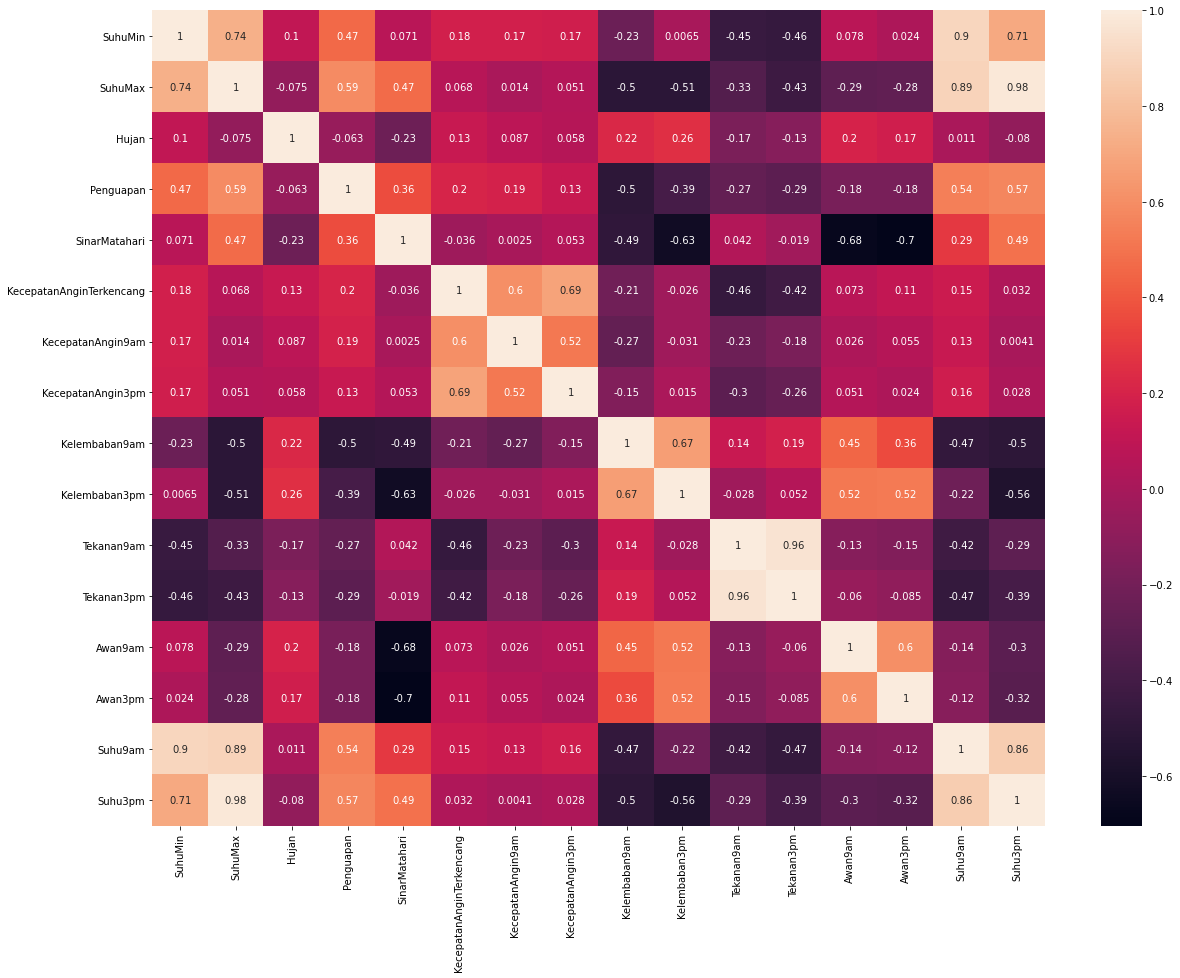

In [12]:
#menampilkan korelasi antara feature yang ada
corr = dt_cluster.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True);

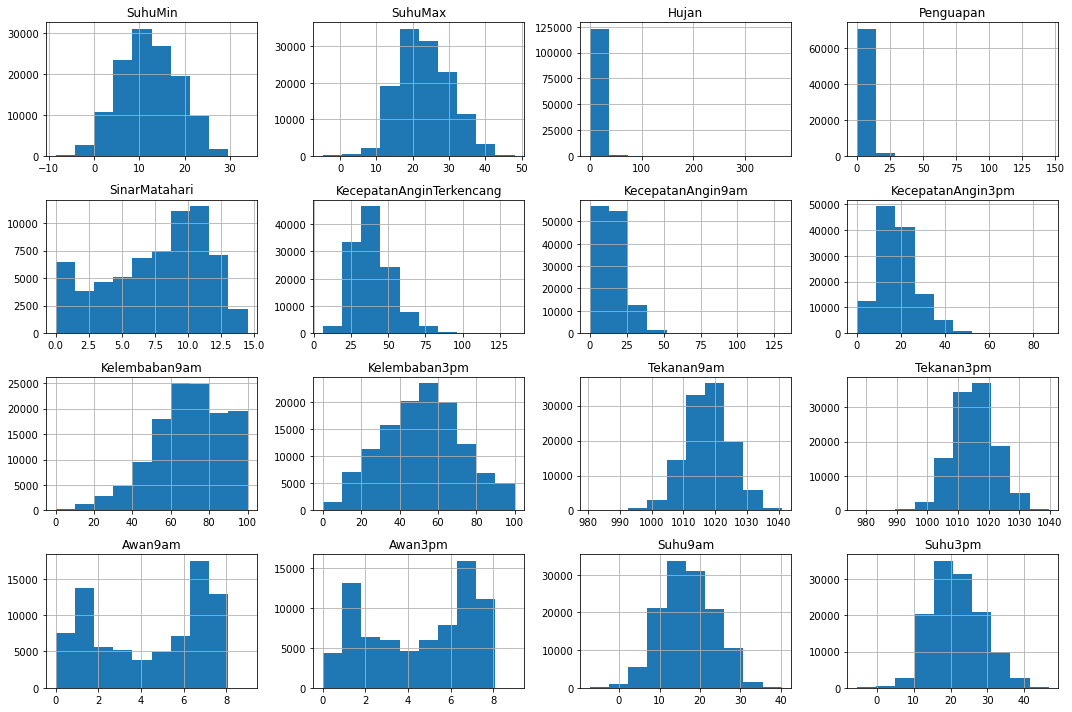

In [13]:
#CheckingDistribution
dt_cluster.hist(bins=10,figsize=(15,10))
plt.tight_layout()

In [14]:
#Checking For Outliers 
features_1 = [
    'SuhuMin','SuhuMax'
]
features_2 = [
    'Hujan','Penguapan','SinarMatahari'
]
features_3 = [
    'KecepatanAnginTerkencang','KecepatanAngin9am','KecepatanAngin3pm',
]
features_4 = [
    'Kelembaban9am','Kelembaban3pm'
]
features_5 = [
    'Tekanan9am','Tekanan3pm'
]
features_6 = [
    'Awan9am','Awan3pm'
]
features_7 = [
    'Suhu9am', 'Suhu3pm'
]


<AxesSubplot:>

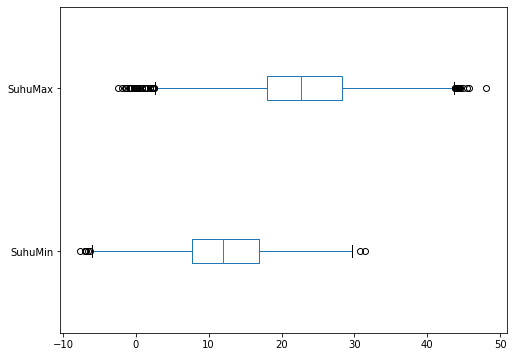

In [15]:
dt_test[features_1].plot(kind='box',figsize=(8,6),vert=False)

<AxesSubplot:>

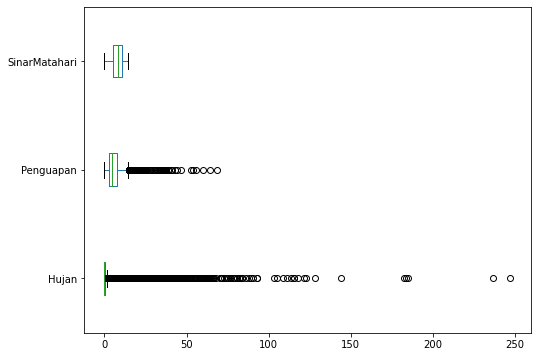

In [16]:
dt_test[features_2].plot(kind='box',figsize=(8,6),vert=False)

<AxesSubplot:>

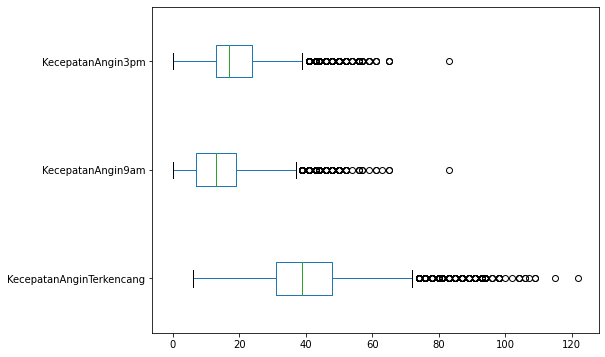

In [17]:
dt_test[features_3].plot(kind='box',figsize=(8,6),vert=False)

<AxesSubplot:>

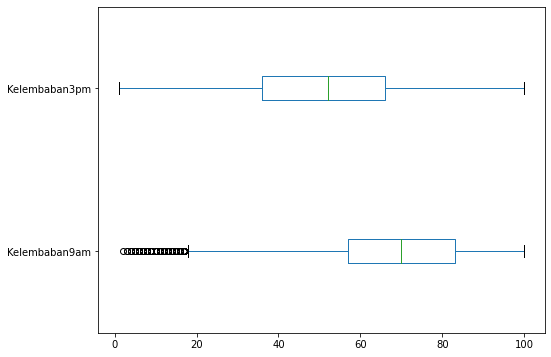

In [18]:
dt_test[features_4].plot(kind='box',figsize=(8,6),vert=False)

<AxesSubplot:>

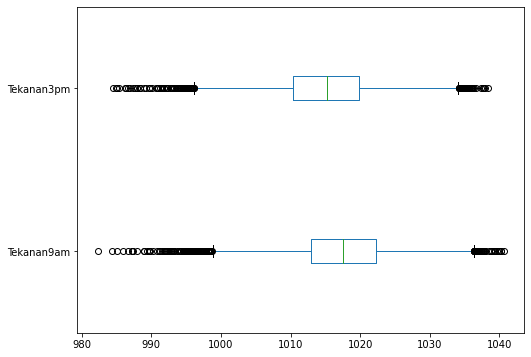

In [19]:
dt_test[features_5].plot(kind='box',figsize=(8,6),vert=False)

<AxesSubplot:>

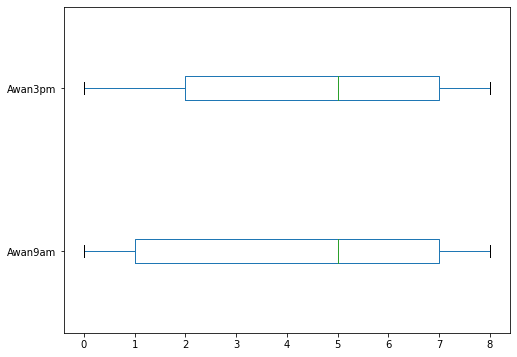

In [20]:
dt_test[features_6].plot(kind='box',figsize=(8,6),vert=False)

<AxesSubplot:>

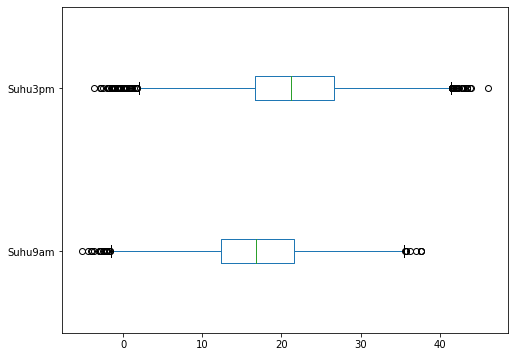

In [21]:
dt_test[features_7].plot(kind='box',figsize=(8,6),vert=False)

## Data Cleansing

In [22]:
#HandleMissingValueinDataset
dt_cluster = dt_cluster.dropna()

In [23]:
#check jumlah data kosong pada dataset
dt_cluster.isna().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [24]:
dt_cluster.shape

(49427, 23)

In [25]:
#drop data yang tidak digunakan pada clustering
dt_cluster = dt_cluster.drop(['BersaljuHariIni','BersaljuBesok','ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm','Tanggal','KodeLokasi'], axis=1)

## Feature Engineering

In [26]:
#memilihfeature yang akan digunakan pada clustering
dt_model1cluster = dt_cluster[['SuhuMin','SuhuMax','Tekanan9am','Tekanan3pm','Suhu9am','Suhu3pm']]
dt_model1cluster.head()

SuhuMin  SuhuMax  Tekanan9am  Tekanan3pm  Suhu9am  Suhu3pm
2       9.2     27.2      1018.6      1015.7     13.9     26.3
3      17.7     27.0      1010.2      1008.6     22.3     26.4
7      14.4     22.4      1022.6      1020.7     18.3     20.9
8      20.3     33.7      1007.7      1005.6     24.6     32.2
10      8.1     18.2      1027.1      1024.5     10.3     17.7

In [27]:
#dropOutlierUsingIQR
dt_iqr = dt_model1cluster
q1 = dt_iqr.quantile(0.25)
q3 = dt_iqr.quantile(0.75)
IQR = q3 - q1
low = q1 - 1.5*IQR
high = q3 + 1.5*IQR
df_model1cluster = dt_iqr[~((dt_iqr < (q1 - 1.5 * IQR)) |(dt_iqr > (q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
df_model1cluster.reset_index(drop=True)

SuhuMin  SuhuMax  Tekanan9am  Tekanan3pm  Suhu9am  Suhu3pm
0          9.2     27.2      1018.6      1015.7     13.9     26.3
1         17.7     27.0      1010.2      1008.6     22.3     26.4
2         14.4     22.4      1022.6      1020.7     18.3     20.9
3         20.3     33.7      1007.7      1005.6     24.6     32.2
4          8.1     18.2      1027.1      1024.5     10.3     17.7
...        ...      ...         ...         ...      ...      ...
48801     16.8     34.1      1013.4      1009.2     25.6     33.0
48802      8.7     19.0      1024.6      1022.3     10.8     16.5
48803     14.3     26.2      1019.2      1015.6     21.1     25.5
48804     20.1     23.7      1019.3      1017.6     22.0     22.1
48805     10.8     29.8      1020.0      1015.8     21.7     29.2

[48806 rows x 6 columns]

In [29]:
#minMaxScalar datasets
df_modelcluster = df_model1cluster.copy()
for col in df_model1cluster.columns:
    df_modelcluster[col] = (df_model1cluster[col] - df_model1cluster[col].min()) / (df_model1cluster[col].max() - df_model1cluster[col].min())

In [30]:
df_modelcluster.reset_index(drop=True)

SuhuMin   SuhuMax  Tekanan9am  Tekanan3pm   Suhu9am   Suhu3pm
0      0.413223  0.534527    0.536785    0.525333  0.377261  0.559796
1      0.647383  0.529412    0.307902    0.336000  0.594315  0.562341
2      0.556474  0.411765    0.645777    0.658667  0.490956  0.422392
3      0.719008  0.700767    0.239782    0.256000  0.653747  0.709924
4      0.382920  0.304348    0.768392    0.760000  0.284238  0.340967
...         ...       ...         ...         ...       ...       ...
48801  0.622590  0.710997    0.395095    0.352000  0.679587  0.730280
48802  0.399449  0.324808    0.700272    0.701333  0.297158  0.310433
48803  0.553719  0.508951    0.553134    0.522667  0.563307  0.539440
48804  0.713499  0.445013    0.555858    0.576000  0.586563  0.452926
48805  0.457300  0.601023    0.574932    0.528000  0.578811  0.633588

[48806 rows x 6 columns]

In [31]:
df_modelcluster.to_csv("DatasetAfterPreprocessing.csv",index=False,header=True) 

## Modeling

In [31]:
#fungsi untuk menghitung euclidean distance
def euclidean_dist(data,centroid):
    hasil = np.sum((data-centroid)**2)  
    return np.sqrt(hasil)

#fungsi untuk memilih centroid
def choose_centroid(k,data):
    centroid = []
    choose = np.random.choice(len(data),k,replace=False)
    for i in choose:
        centroid.append(data[i])
    return centroid

#fungsi untuk melakukan terhadap nilai centroid
def update_centroid(clusters,data):
    dt_centroid = []
    for index,item in enumerate(clusters):
        #print(np.mean(data[item])
        dt_centroid.append(np.average(data[item], axis=0))
    return dt_centroid       

#fungsi untuk menghitung nilai sumsquareerror(SSE)
def sum_square_errors(data,centroids):
    sum_square_error = 0
    for i in range(len(data)):
        dists = []
        for j in range(len(centroids)):
            distance = euclidean_dist(data[i],centroids[j])
            dists.append(distance)
        sum_square_error = sum_square_error + np.square(min(dists))
    return sum_square_error

In [32]:
#main algorithm kmeans
def kmeans_func(k,data,iteration,dataset):
    centroids = choose_centroid(k,data)
    clusters = [[] for i in range(k)]
    for i in range(iteration):
        for index,item in enumerate(data):
            dists = [euclidean_dist(item,centroid) for centroid in centroids]
            index_centroid = np.argmin(dists)
            clusters[index_centroid].append(index)
        old_centroids = centroids.copy()
        centroids = update_centroid(clusters,data)
        changes = True
        for index,item in enumerate(old_centroids):
            if(euclidean_dist(item,centroids[index]) == 0):
                changes = False
        if(changes == False):
            break
    labels = np.empty(len(data))
    for index,item in enumerate(clusters):
        for idx in item:
            labels[idx] = index
    dataset['Cluster'] = labels
    return old_centroids

In [33]:
def count_sse(k,data,iteration,dataset):
    centroids = kmeans_func(k,data,iteration,dataset)
    sse = sum_square_errors(data,centroids)
    return sse

## Model 1

In [34]:
df_model1 = df_modelcluster[['SuhuMin','SuhuMax','Suhu9am','Suhu3pm']]
df_model1.reset_index(drop=True)

SuhuMin   SuhuMax   Suhu9am   Suhu3pm
0      0.413223  0.534527  0.377261  0.559796
1      0.647383  0.529412  0.594315  0.562341
2      0.556474  0.411765  0.490956  0.422392
3      0.719008  0.700767  0.653747  0.709924
4      0.382920  0.304348  0.284238  0.340967
...         ...       ...       ...       ...
48801  0.622590  0.710997  0.679587  0.730280
48802  0.399449  0.324808  0.297158  0.310433
48803  0.553719  0.508951  0.563307  0.539440
48804  0.713499  0.445013  0.586563  0.452926
48805  0.457300  0.601023  0.578811  0.633588

[48806 rows x 4 columns]

In [35]:
#menggunakan PCA untuk menggabungkan Feature
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model1)
dt_pca = pd.DataFrame(data = pca_fit, columns = ['PC1','PC2'])
dt_pca.head()

PC1       PC2
0 -0.029964  0.187311
1  0.189191 -0.034049
2 -0.037233 -0.061729
3  0.416194  0.044431
4 -0.320223  0.026824

Text(0.5, 1.0, 'Plot from Unclustered Data')

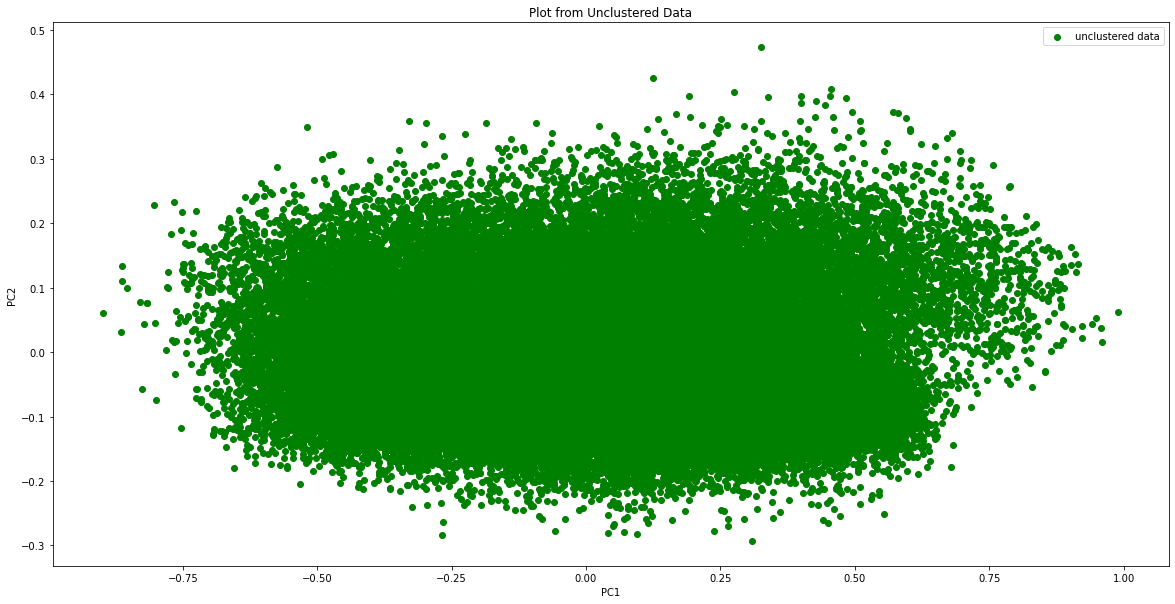

In [36]:
#visualisasi data yang belum diklaster dari model 1
plt.figure(figsize=(20,10))
plt.scatter(dt_pca['PC1'],dt_pca['PC2'],c='green',label='unclustered data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Plot from Unclustered Data')

In [37]:
#change dataframe to array
x = dt_pca.values
x

array([[-0.02996354,  0.18731088],
       [ 0.18919133, -0.03404942],
       [-0.03723255, -0.06172889],
       ...,
       [ 0.10673945,  0.02171268],
       [ 0.11829771, -0.16929752],
       [ 0.16333472,  0.17336562]])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


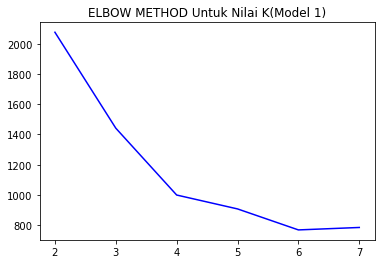

In [38]:
#membuatvisualisasielbowmethod
elbow=[]
for i in range(2, 8):
    sse = count_sse(i,x,10,dt_pca)
    elbow.append(sse)
sns.lineplot(range(2, 8), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD Untuk Nilai K(Model 1)')
plt.ylabel(SSE)
plt.xlabel(K)
plt.show()

In [45]:
dt_model1 = dt_pca[['PC1','PC2']]
X = dt_model1.values

In [46]:
centroids = kmeans_func(4,X,10,dt_model1)

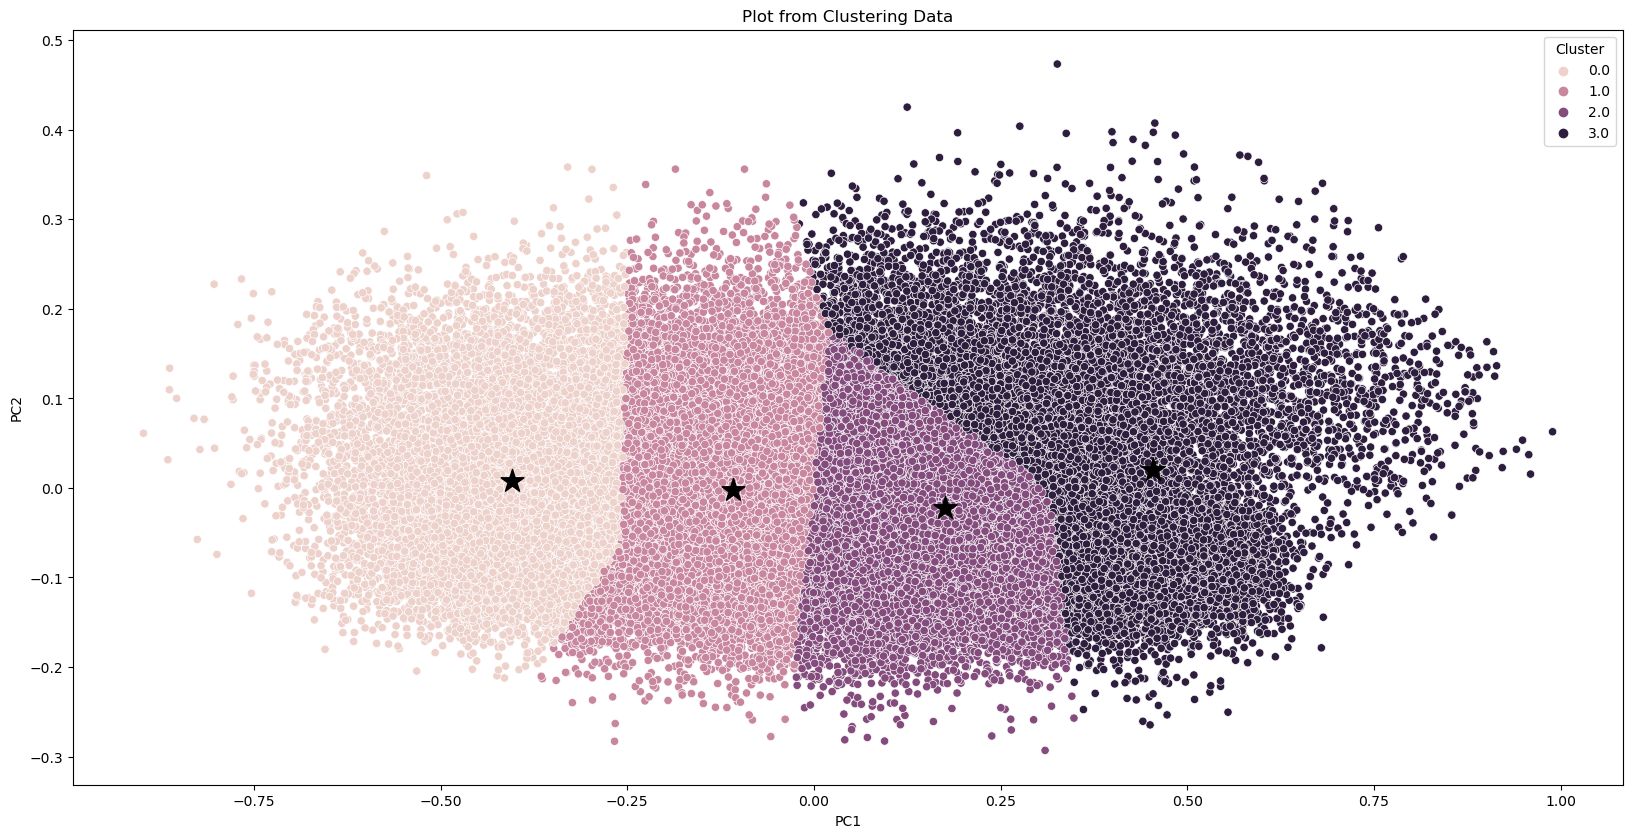

In [47]:
#membuatvisualisasihasilclustering untuk model 1
plt.figure(figsize=(20,10))
plt.title('Plot from Clustering Data')
sns.scatterplot(x="PC1",y="PC2",hue="Cluster",data=dt_model1)
plt.scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
            c='black', label='centroid')
plt.scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
            c='black', label='centroid')
plt.scatter(centroids[2][0], centroids[2][1], marker='*', s=300,
            c='black', label='centroid')
plt.scatter(centroids[3][0], centroids[3][1], marker='*', s=300,
            c='black', label='centroid')
plt.show()

In [48]:
score = silhouette_score(X,dt_model1['Cluster'],metric='euclidean')
score

0.3433278976530937

## Model 2

In [84]:
dt_model2 = df_modelcluster[['SuhuMin','SuhuMax']]
dt_model2.reset_index(drop=True)

SuhuMin   SuhuMax
0      0.413223  0.534527
1      0.647383  0.529412
2      0.556474  0.411765
3      0.719008  0.700767
4      0.382920  0.304348
...         ...       ...
48801  0.622590  0.710997
48802  0.399449  0.324808
48803  0.553719  0.508951
48804  0.713499  0.445013
48805  0.457300  0.601023

[48806 rows x 2 columns]

Text(0.5, 1.0, 'Plot from Unclustered Data')

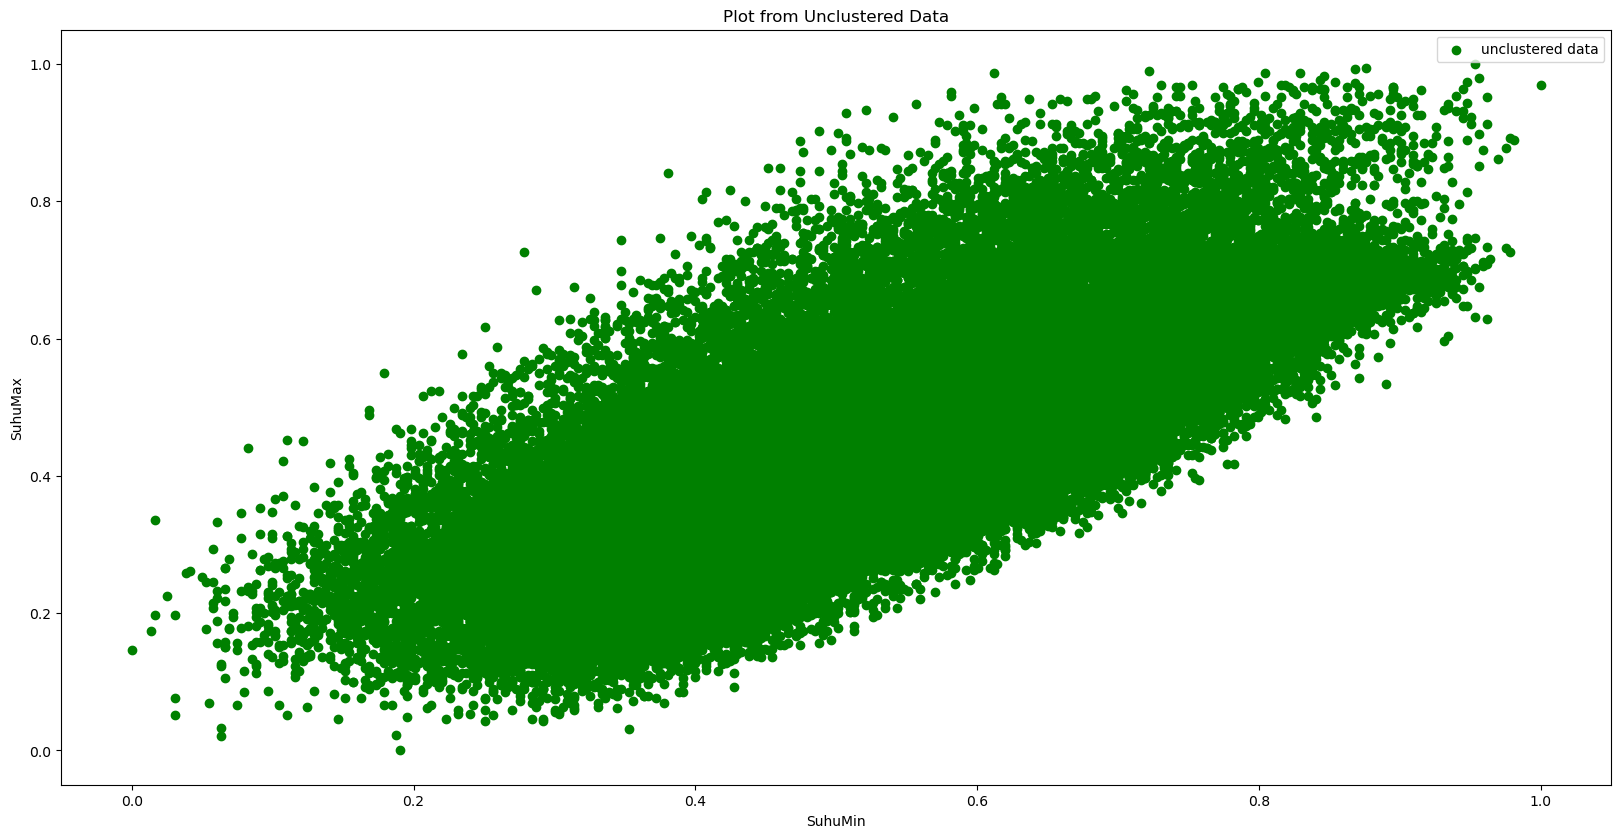

In [85]:
plt.figure(figsize=(20,10))
plt.scatter(dt_model2['SuhuMin'],dt_model2['SuhuMax'],c='green',label='unclustered data')
plt.xlabel('SuhuMin')
plt.ylabel('SuhuMax')
plt.legend()
plt.title('Plot from Unclustered Data')

In [86]:
y = dt_model2.values
y

array([[0.41322314, 0.53452685],
       [0.64738292, 0.52941176],
       [0.55647383, 0.41176471],
       ...,
       [0.55371901, 0.50895141],
       [0.71349862, 0.44501279],
       [0.45730028, 0.60102302]])

<ipython-input-32-b74f250b81cc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cluster'] = labels
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


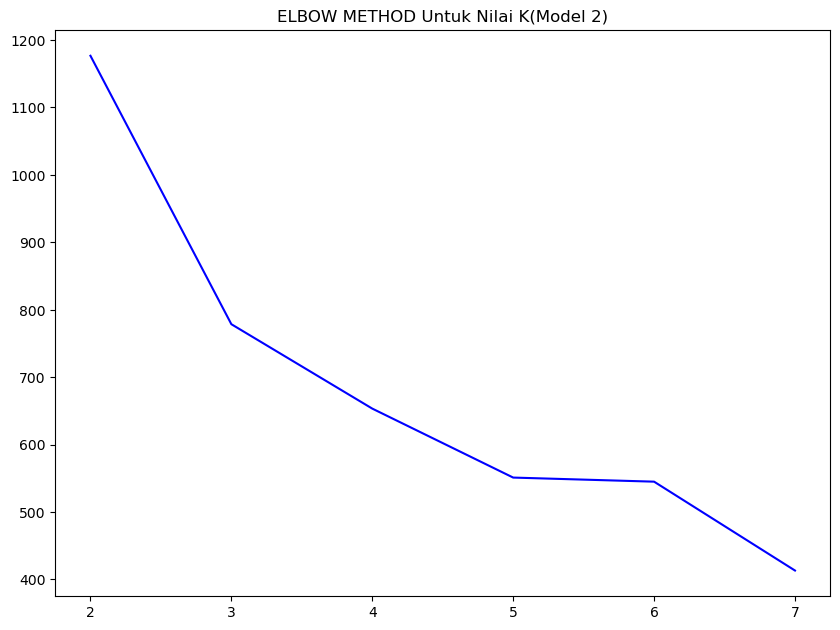

In [87]:
#membuat visualisasi terhadap elbow method
elbows=[]
for i in range(2, 8):
    sse = count_sse(i,y,10,dt_model2)
    elbows.append(sse)
sns.lineplot(range(2, 8), elbows,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD Untuk Nilai K(Model 2)')
plt.show()

In [53]:
dtmodel2 = dt_model2[['SuhuMin','SuhuMax']]
Y = dtmodel2.values
dtmodel2

SuhuMin   SuhuMax
2       0.413223  0.534527
3       0.647383  0.529412
7       0.556474  0.411765
8       0.719008  0.700767
10      0.382920  0.304348
...          ...       ...
127262  0.622590  0.710997
127264  0.399449  0.324808
127270  0.553719  0.508951
127272  0.713499  0.445013
127275  0.457300  0.601023

[48806 rows x 2 columns]

In [90]:
centroids = kmeans_func(3,Y,10,dtmodel2)

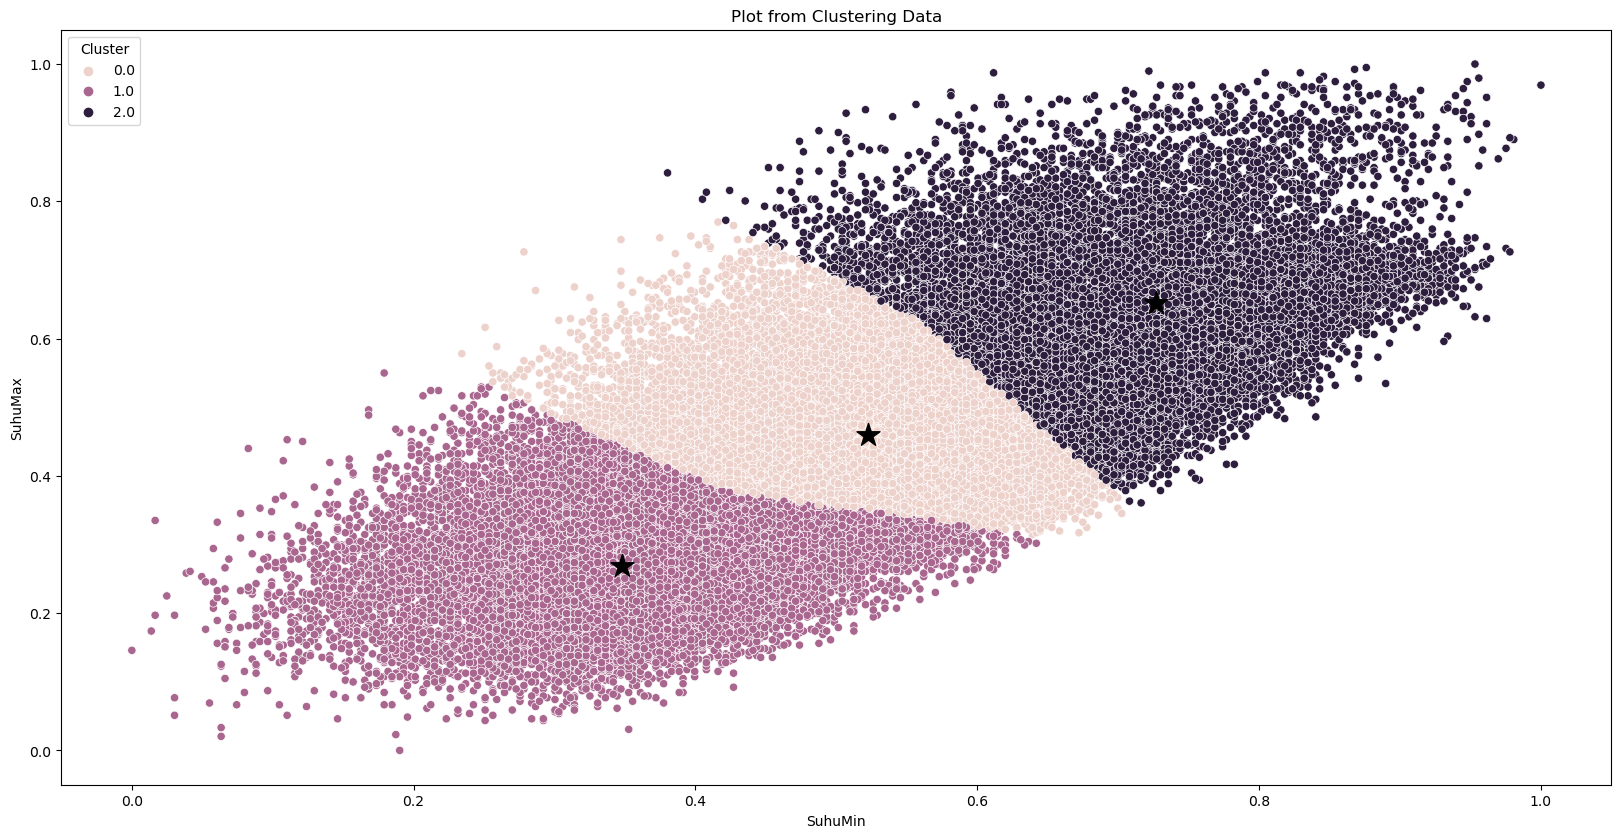

In [91]:
#membuat visualisasi terhadap hasil klasterisasi model 2
plt.figure(figsize=(20,10))
plt.title('Plot from Clustering Data')
sns.scatterplot(x="SuhuMin",y="SuhuMax",hue="Cluster",data=dtmodel2)
plt.scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
            c='black', label='centroid')
plt.scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
            c='black', label='centroid')
plt.scatter(centroids[2][0], centroids[2][1], marker='*', s=300,
            c='black', label='centroid')
plt.show()

In [92]:
score = silhouette_score(Y,dtmodel2['Cluster'],metric='euclidean')
score

0.3854532401934225

## Model 3

In [54]:
dt_model3 = df_modelcluster[['Tekanan9am','Tekanan3pm']]
dt_model3.reset_index(drop=True)

Tekanan9am  Tekanan3pm
0        0.536785    0.525333
1        0.307902    0.336000
2        0.645777    0.658667
3        0.239782    0.256000
4        0.768392    0.760000
...           ...         ...
48801    0.395095    0.352000
48802    0.700272    0.701333
48803    0.553134    0.522667
48804    0.555858    0.576000
48805    0.574932    0.528000

[48806 rows x 2 columns]

Text(0.5, 1.0, 'Plot from Unclustered Data')

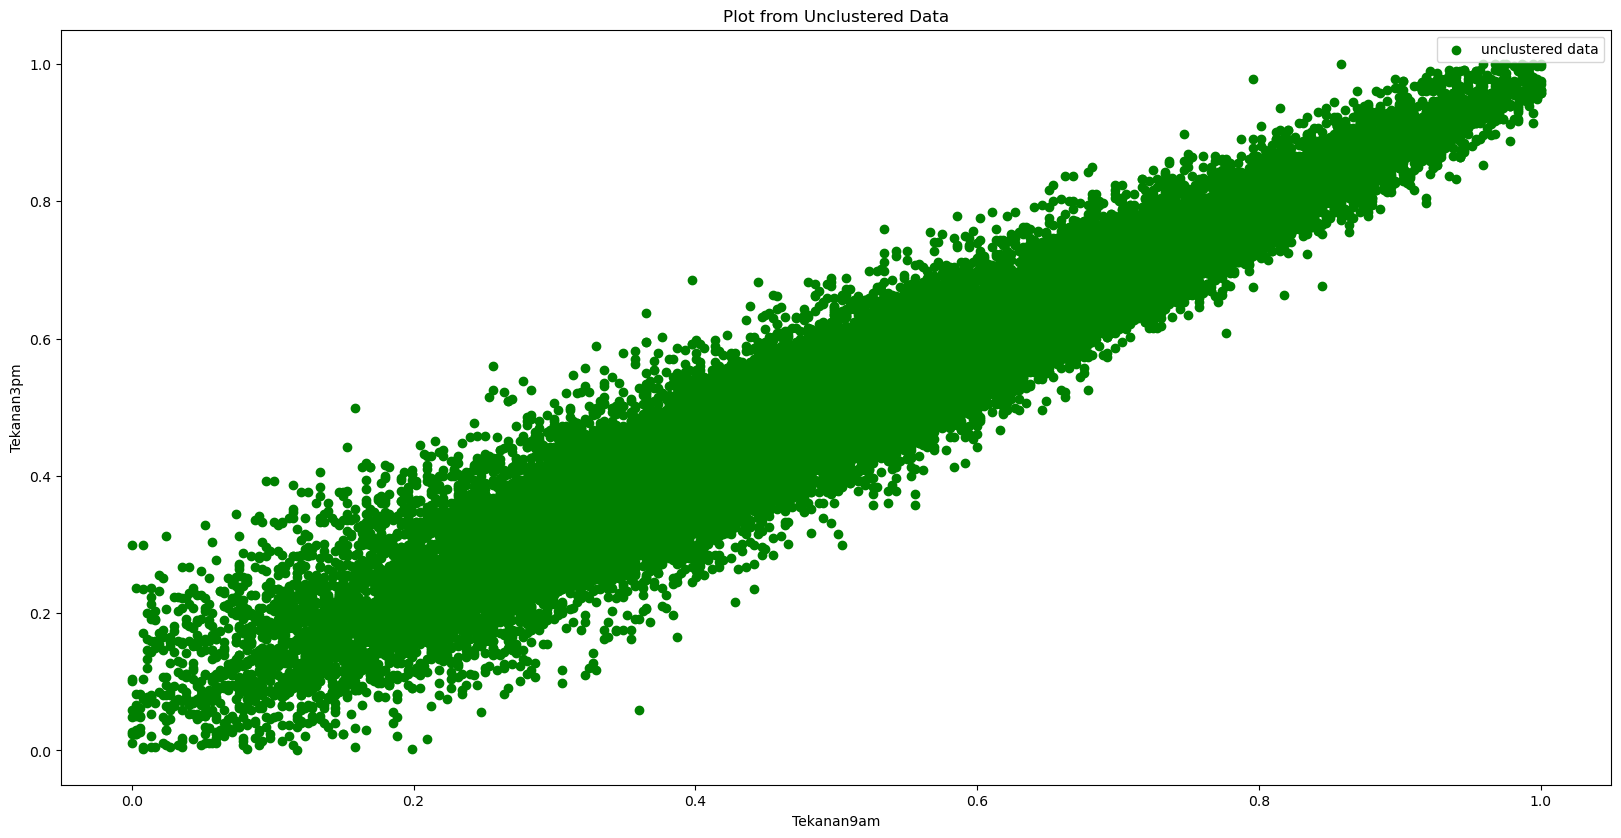

In [55]:
#membuat visualisasi data sebelum diklusteriasasi
plt.figure(figsize=(20,10))
plt.scatter(dt_model3['Tekanan9am'],dt_model3['Tekanan3pm'],c='green',label='unclustered data')
plt.xlabel('Tekanan9am')
plt.ylabel('Tekanan3pm')
plt.legend()
plt.title('Plot from Unclustered Data')

In [56]:
z = dt_model3.values

<ipython-input-32-b74f250b81cc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cluster'] = labels
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


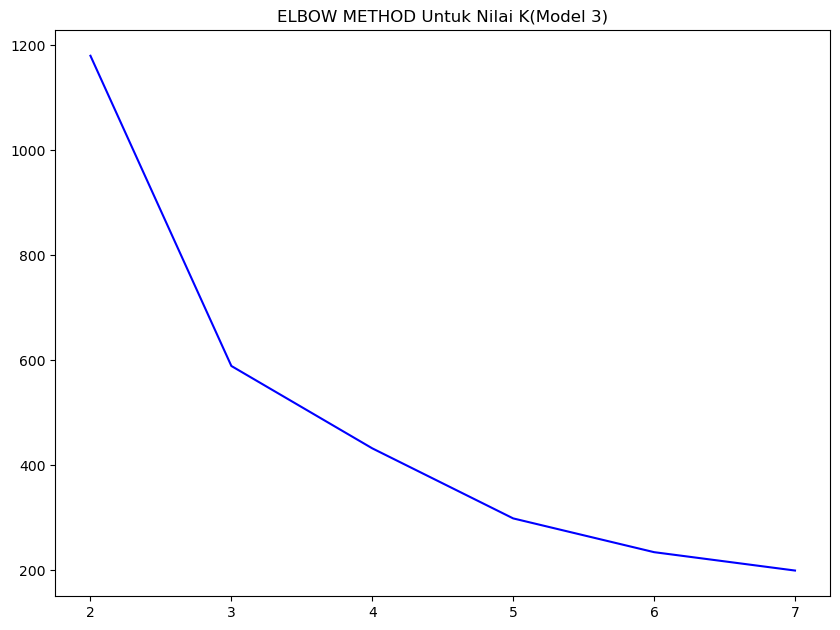

In [73]:
#membuat elbow method untuk model 3 
elbowz=[]
for i in range(2, 8):
    sse = count_sse(i,z,10,dt_model3)
    elbowz.append(sse)
sns.lineplot(range(2, 8), elbowz,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD Untuk Nilai K(Model 3)')
plt.show()

In [77]:
dtmodel3 = dt_model3[['Tekanan9am','Tekanan3pm']]
Z = dtmodel3.values

In [78]:
centroids = kmeans_func(3,Z,10,dtmodel3)

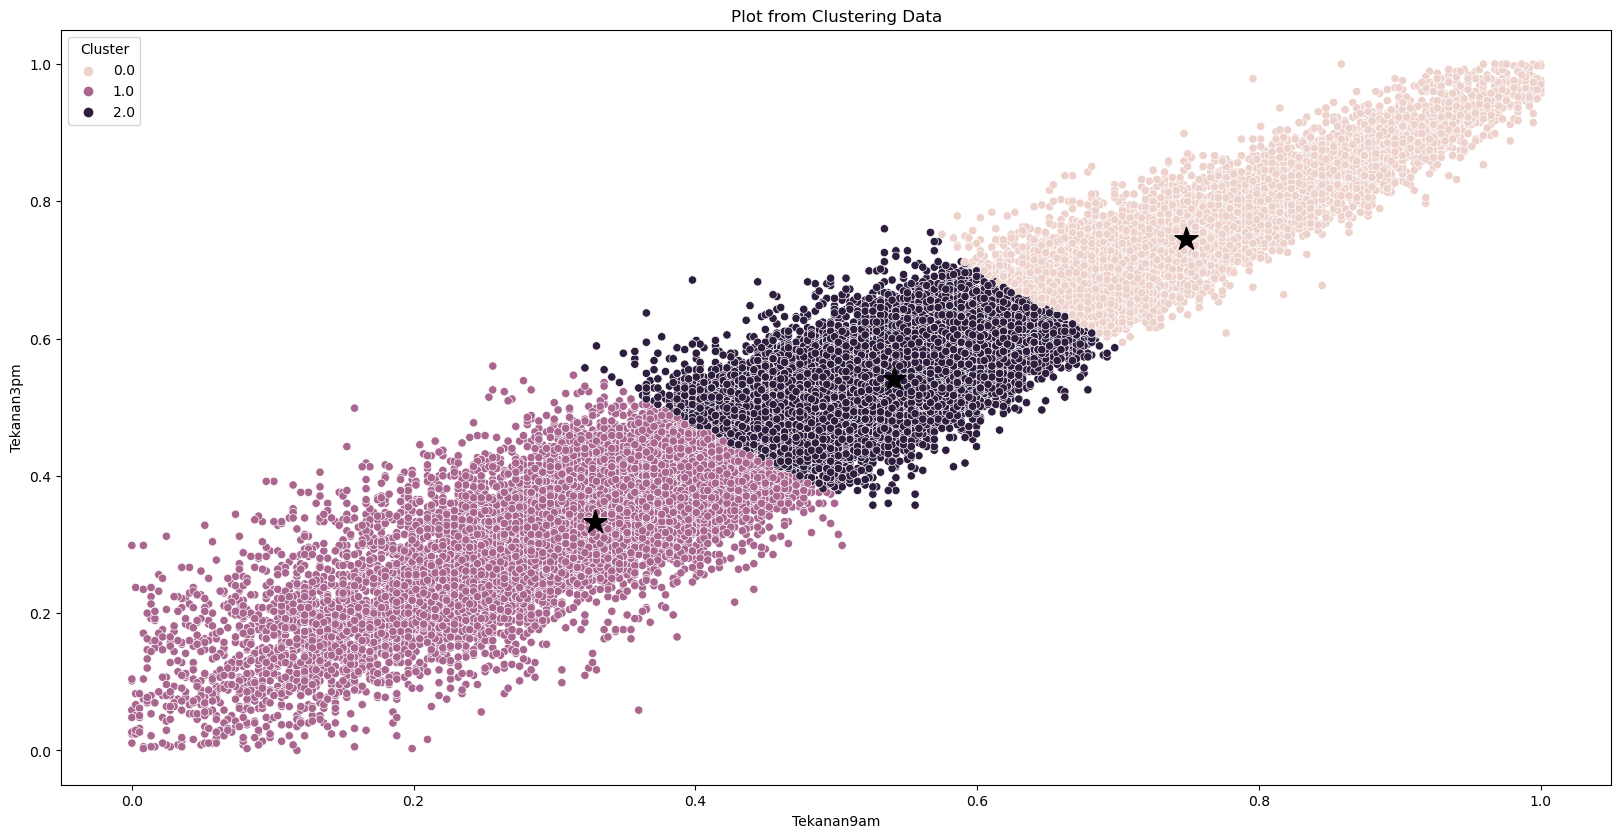

In [79]:
plt.figure(figsize=(20,10))
plt.title('Plot from Clustering Data')
sns.scatterplot(x="Tekanan9am",y="Tekanan3pm",hue="Cluster",data=dtmodel3)
plt.scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
            c='black', label='centroid')
plt.scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
            c='black', label='centroid')
plt.scatter(centroids[2][0], centroids[2][1], marker='*', s=300,
            c='black', label='centroid')
plt.show()

In [80]:
score = silhouette_score(Z,dtmodel3['Cluster'],metric='euclidean')
score

0.4927466757579019